# Trends in Time Series

Identifying and understanding trend information can aid in improving model performance for several reasons:

- Faster Modeling: The knowledge of a trend or lack of a trend can suggest methods and make model selection and evaluation more efficient
- Simpler Problem: We can correct or remove the trend to simplify modeling and imporve model performance
- More data: We can use trend information, directly or as a summary, to provide additional information to the model and improve model performance

## Types of Trends

- Deterministic Trends: trends that consistently increase or decrease
    - These are easier to identify and remove
- Stochastic Trends: trends that increase and decresase inconsistently
- Global Trends: trends that apply to the whole time series
- Local Trends: trends that apply to parts or subseqeunces of a time series

## Using Time Series Trends in Machine Learning

- Remove Information: remove systematic information that distorts the relationship between input and output variables
- Add Information: add systematic information to improve the relationship between input and output variables

### Detrend by Differencing

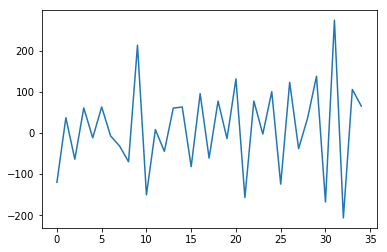

In [4]:
#Detrend a time series using differencing
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import pandas as pt

def parser(x):
    try:
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pt.NaT
    
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col = 0, squeeze = True, date_parser=parser)
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

Running the example creates the new detrended dataset and then plots the time series. Because no difference value can be created for the first observation (there is nothing for it to be subtracted from), the new dataset contains one less record.

This approach works well for data with a linear trend. If the trend is quadratic (the change in the trend also increases or decreases), then a di↵erence of the already-di↵erenced dataset can be taken, a second level of differencing. This process can be further repeated if needed. Because di↵erencing only requires the observation at the previous time step, it can easily be applied to unseen out-of-sample data to either pre-process or provide an additional input for supervised learning.

### Detrend by Model Fitting

A trend is often easily visualized as a line through the observations. Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method. Because of the subjective and domain-specific nature of identifying trends, this approach can help to identify whether a trend is present. Even fitting a linear model to a trend that is clearly super-linear or exponential can be helpful.

Predictions from this model will form a straight line that can be taken as the trend line for the dataset. These predictions can also be subtracted from the original time series to provide a dtrended version of the dataset.

The residuals from the fit of the model are a detrended form of the dataset. Polynomial curve fitting and other nonlinear models can also be used.

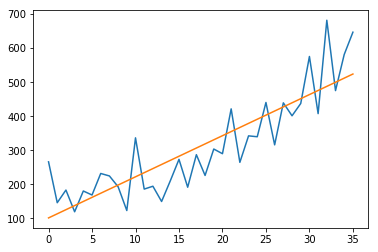

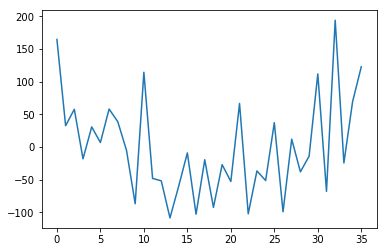

In [50]:
# Using a linear model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot 
import pandas as pd
import numpy as np

def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return value


series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)

#fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
X = X[:-1]
y = series.values
y = y[:-1]
model = LinearRegression()
model.fit(X, y)
#Calculate Trend
trend = model.predict(X)

#Plot Trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# Detrended
detrended = [y[i]-trend[i] for i in range(0, (len(series)-1))]

#Plot detrended
pyplot.plot(detrended)
pyplot.show()

Again, we can see that this approach has effectively detrended the dataset. There may be a parabola in the residuals, suggesting that perhaps a polynomial fit may have done a better job. Because the trend model takes only the integer index of the observation as input, it can be used on new data to either detrend or provide a new input variable for the model.